In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
df = pd.read_csv(r"C:\Users\ishit\Downloads\winequality.csv")
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
df.shape

(6497, 13)

In [4]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df['fixed acidity'].fillna(0,inplace=True)
df['volatile acidity'].fillna(0,inplace=True)
df['citric acid'].fillna(0,inplace=True)
df['residual sugar'].fillna(0,inplace=True)
df['chlorides'].fillna(0,inplace=True)
df['pH'].fillna(0,inplace=True)
df['sulphates'].fillna(0,inplace=True)

In [7]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
X=df.drop('quality',axis=1)
X=X.values

from sklearn import preprocessing
#from sklearn.preprocessing import LabelEncoder
# df.colymn_name = LabelEncoder().fit_transform(df.column_name)


newtype= preprocessing.LabelEncoder()
newtype.fit(['white','red'])
X[:,0]=newtype.transform(X[:,0])
X=np.asarray(X)

In [9]:
y=np.asarray(df['quality'])
y

array([6, 6, 6, ..., 6, 5, 6], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
from sklearn.neighbors import KNeighborsClassifier
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set: (5197, 12) (5197,)
Test set: (1300, 12) (1300,)
Train set Accuracy:  0.7425437752549547
Test set Accuracy:  0.4869230769230769


[0.57923077 0.51       0.48692308 0.46461538 0.45153846 0.46692308
 0.45230769 0.45461538 0.45153846 0.44153846 0.45307692 0.45384615
 0.43538462 0.43153846]


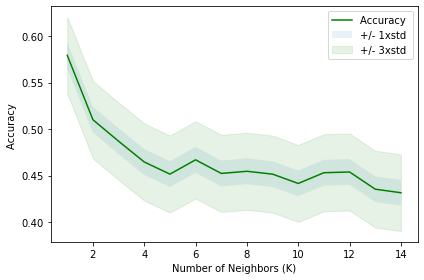

The best accuracy was with 0.5792307692307692 with k= 1


In [11]:
Ks = 15
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

print(mean_acc)
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


[[  0   1   2   3   0   0   0]
 [  0   0  30  13   1   0   0]
 [  0   1 207 201  19   2   0]
 [  0   2 192 313  40   2   0]
 [  0   1  37 148  41   0   0]
 [  0   0  11  23   9   0   0]
 [  0   0   1   0   0   0   0]]


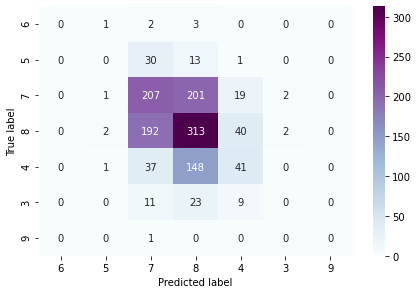

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
c=metrics.confusion_matrix(y_test, yhat)
print(c)
classes=[6, 5, 7, 8, 4, 3, 9]
sns.heatmap(c,cmap="BuPu",annot=True,fmt="d",xticklabels=classes,yticklabels=classes)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()